# Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

## Mission objectives

Experience the specificities of anomaly detection
Tackle severely imbalanced datasets
Learn to collaborate and spread knowledge effectively as a pluri-disciplinary team
Deploy a dashboard using Tableau

## The Mission

You are a team of freelance data scientists lending a hand to a Belgian bank. They asked you to analyse a dataset of credit card transactions and come up with a model that flags those potentially fraudulent. For confidentiality reasons, they cannot share the original data (see dataset explanations) but the transactions are otherwise real.

You will quickly evaluate the different methods at your disposal and select the 3 most appropriate. From there, you will find a scientific way to test them on your dataset. All the scripts (even python ones) and visualizations must be run from Tableau.

## Load Data

In [62]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
from IPython.display import HTML
#from IPython.display import YouTubeVideo

import pickle
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

Numpy version : Numpy 1.23.4
Pandas version : Pandas 1.5.0
Matplotlib version : Matplotlib 3.6.1
Seaborn version : Seaborn 0.12.0
SkLearn version : SkLearn 1.1.2
Plotly version : plotly 5.10.0


Import dataset

In [63]:
df = pd.read_csv('creditcard.csv', encoding='latin_1')
df.columns = df.columns.str.lower()
print(df.shape)
df.head()

(284807, 31)


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
# #Count unique values of label

# print(df['class'].value_counts())
# print('\n')
# print(df['class'].value_counts(normalize=True))

In [65]:
# df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=False)
# plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
# plt.legend(["Genuine","Fraud"])
# plt.show()

In [66]:
#Finding null values

# Dealing with missing data
# df.isnull().sum().max()

In [67]:

# fig, axs = plt.subplots(ncols=2,figsize=(16,4))
# sns.distplot(df[df['class'] == 1]['amount'], bins=100, ax=axs[0])
# axs[0].set_title("Distribution of Fraud Transactions")

# sns.distplot(df[df['class'] == 0]['amount'], bins=100, ax=axs[1])
# axs[1].set_title("Distribution of Genuine Transactions")

# plt.show()

Highlights

This graph shows that most of the fraud transaction amount is less than 500 dollars. This also shows that the fraud transaction is very high for an amount near to 0, let's find that amount.

In [68]:
# print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
# print("\n")
# print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
# print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Highlights

There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.
There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

In [69]:
# print("Genuine Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
# print("\n")
# print("Maximum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].max())
# print("Minimum amount of Genuine transaction - ",df[(df['class'] == 0)]['amount'].min())

In [70]:
# #Distribution of time
# plt.figure(figsize=(8,6))
# plt.title('Distribution of Transaction Time', fontsize=14)
# sns.distplot(df['time'], bins=100)
# plt.show()

Highlights

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

In [71]:
# #Distribution of time w.r.t. transactions types¶


# fig, axs = plt.subplots(ncols=2, figsize=(16,4))

# sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
# axs[0].set_title("Distribution of Fraud Transactions")

# sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='green', ax=axs[1])
# axs[1].set_title("Distribution of Genuine Transactions")

# plt.show()

## Correlation Among Explanatory Variables
Having too many features in a model is not always a good thing because it might cause overfitting and worse results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is a very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. However, this does not mean that you must remove one of the highly correlated features.

Let's find out top 10 features which are highly correlated with a price.

In [72]:
# df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

In [73]:
# plt.title('Pearson Correlation Matrix')
# sns.heatmap(df[['time', 'amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
#             linecolor='w',annot=True);

Highlights

It looks like that no features are highly correlated with any other features.

In [74]:
#Lets check the data again after cleaning

# df.shape

In [75]:
# df.shape


In [76]:
#Feature Engineering

# df.hist(figsize = (25,25))
# plt.show()

In [77]:
#Reset the index

# df.reset_index(inplace = True , drop = True)

In [78]:
# df.head()

## Tutorial 1

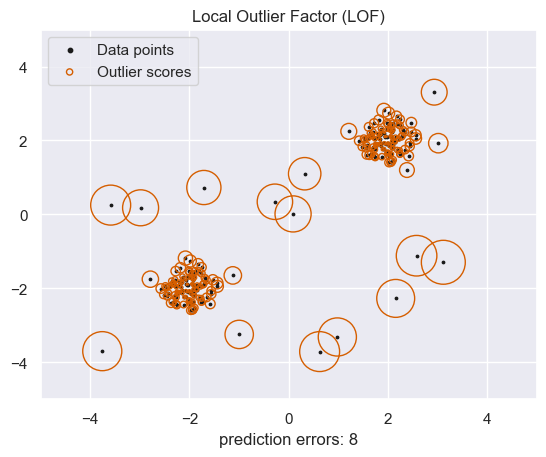

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)


# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

## Tutorial 2

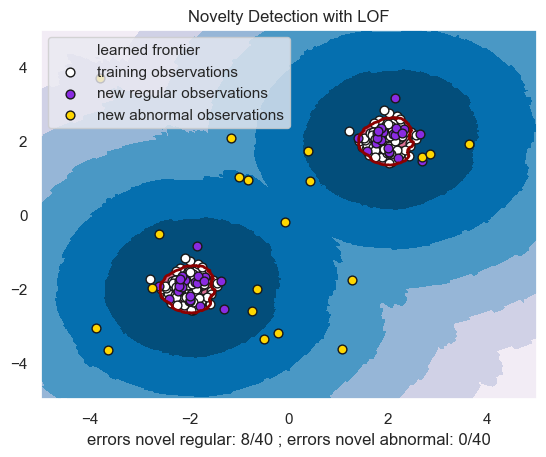

In [80]:
#tutorial 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate normal (not abnormal) training observations
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate new normal (not abnormal) observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)

# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the learned frontier, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection with LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')


s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers))
plt.show()

## Turtorial 3

In [81]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.datasets import make_blobs
#from numpy import quantile, where, random
# import matplotlib.pyplot as plt

# random.seed(1)
# x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(10,10))

# plt.scatter(x[:,0], x[:,1])
# plt.show()

# lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
# #print(thresh)  
  
# y_pred = lof.fit_predict(x)

# lofs_index=where(y_pred==-1)
# values = x[lofs_index]

# plt.scatter(x[:,0], x[:,1])
# plt.scatter(values[:,0],values[:,1], color='r')
# plt.show()

# model = LocalOutlierFactor(n_neighbors=20) 
# print(model)  
# model.fit_predict(x) 

# lof = model.negative_outlier_factor_
# thresh = quantile(lof, .03)
# print(thresh) 
  
# index = where(lof<=thresh)
# values = x[index]

# plt.scatter(x[:,0], x[:,1])
# plt.scatter(values[:,0],values[:,1], color='r')
# plt.show()

## A few important notes:
LOF will identify an outlier based on the density of its neighborhood. 
LOF is used mostly when the density of the data is not the same throughout the dataset.
To really understand how LOF works, we must go through a few concepts:

#K-distance and K-neighbors:

#Reachability distance (RD):

#Local reachability density (LRD):

#Local Outlier Factor (LOF):

## LOF: Local Outlier Factor 

In [82]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor


In [83]:
dfRaw = pd.read_csv('creditcard.csv')
print(dfRaw.shape)
print(dfRaw.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [84]:
#  SCALER / Normalization

data = dfRaw.copy()
scl = StandardScaler()

all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy) #
OnlyClass = data['Class'].values.reshape(-1,1)

data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)
Percent fraud  0.1727 %


In [85]:
# normal_data.head()

The following on the 75,492 test LOF w 20 neighbors takes 12 mins so for running multiple times to find the best num of neighbors - we'll reduce the test size

In [86]:
# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 20000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([normal_pca_data.sample(frac=1, random_state=1960)[-num_test:], fraud_pca_data[:492]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])

print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

normal_pca_data  (284315, 30)
fraud_pca_data (492, 30)
Fraud data only in Test with NONE in the training
X_train  (264315, 30)
X_test  (20492, 30)
y_test  (20492,)


In [87]:
normal_pca_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [88]:
X_train

array([[-1.6911589 ,  0.66619881,  0.00709956, ..., -0.16408763,
        -0.02754838, -0.293458  ],
       [ 0.69129248,  0.65498349, -0.5552245 , ..., -0.13243933,
         0.12380107,  1.15264977],
       [ 1.00745614,  0.99463714, -0.93390622, ..., -0.08195241,
        -0.12431485,  0.16252373],
       ...,
       [-1.19389709,  0.02008085, -1.34309486, ..., -0.26476445,
         0.27360628,  1.82264906],
       [ 1.42265523,  0.00530938,  0.39967519, ...,  0.57831868,
         0.24117623, -0.33171969],
       [-0.71912514, -0.39223879,  0.72302399, ...,  0.57191935,
         0.54780151, -0.3191657 ]])

In [89]:
X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

X_inliers  (20000, 30)
X_outliers  (492, 30)
X  (20492, 30)
n_outliers  492
percent fraud in test:  0.024009369510052704


In [90]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination = PercFraud)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
n_errors

934

In [91]:
print('accuracy ' , round(1 - (n_errors / X.shape[0]),4))

accuracy  0.9544


In [92]:
# Note that the ground truth and the y_pred for LOF is different than the original ... inliers = normal = 1 and outliers = fraud = -1
# We have to modify the y_pred for the F1 score calculation to be similar to the above 

y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)
print(y_predDF[y_predDF[0] == -1].count())

y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1
print(y_predDF[y_predDF[0] == 1].count())

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

0    492
dtype: int64
0    492
dtype: int64


In [93]:
# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.0508
recall  0.0508
F1 score on Test 0.0508


In [94]:
# Optimize num of neighbors hyper paramter for best F1

minRE = 500
maxRE = 1100
    
EpsF1 = []

for TryRE in range(minRE,maxRE,100):
    clf = LocalOutlierFactor(n_neighbors=TryRE, contamination = PercFraud)
    y_pred = clf.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    X_scores = clf.negative_outlier_factor_
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with num neighbors ", TryRE)
    EpsF1.append([TryRE, round(fbeta_score,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['NumNeighb', 'F1'])
EpsF1df.head()

F1 score on test 0.561  with num neighbors  500
F1 score on test 0.5915  with num neighbors  600
F1 score on test 0.6037  with num neighbors  700
F1 score on test 0.6098  with num neighbors  800
F1 score on test 0.6138  with num neighbors  900
F1 score on test 0.6037  with num neighbors  1000


,NumNeighb,F1
0,500,0.5610
1,600,0.5915
2,700,0.6037
3,800,0.6098
4,900,0.6138


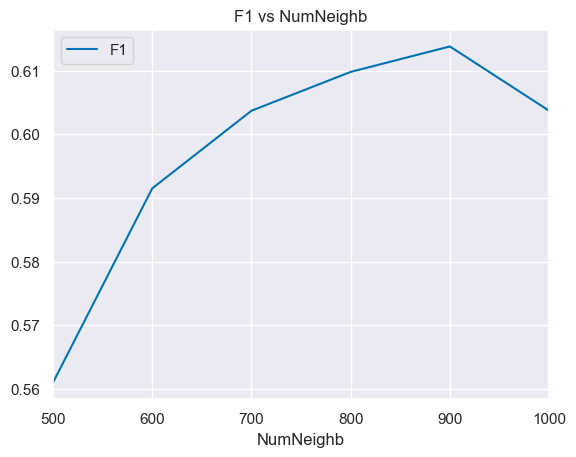

In [95]:
EpsF1df.plot.line("NumNeighb","F1")
plt.xlim(500, 1000)
plt.title("F1 vs NumNeighb")
plt.show()

In [96]:
#Knowing that 900 is the best num of neighbors for LOF we test the original 75,492 so the results can be compared to other models

In [97]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([normal_pca_data.sample(frac=1, random_state=1960)[-num_test:], fraud_pca_data[:129]])
y_test = np.concatenate([np.zeros(num_test), np.ones(129)])

print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)
Percent fraud  0.1727 %
normal_pca_data  (284315, 30)
fraud_pca_data (492, 30)
Fraud data only in Test with NONE in the training
X_train  (209315, 30)
X_test  (75129, 30)
y_test  (75129,)
X_inliers  (75000, 30)
X_outliers  (492, 30)
X  (75492, 30)
n_outliers  492
percent fraud in test:  0.006548736173781097


In [98]:
clf = LocalOutlierFactor(n_neighbors=900, contamination = PercFraud, novelty=True)


# cov = EllipticEnvelope(support_fraction = 0.994, contamination = PercFraud)
# cov_model = cov.fit(X_train)
# # predict test
# y_pred = cov.predict(X_test)


lof_model = clf.fit(X_train)
y_pred = lof_model.predict(X_test)


# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
# print('accuracy ' , round(1 - (n_errors / X.shape[0]),4))
# n_errors

In [99]:
type(lof_model)

sklearn.neighbors._lof.LocalOutlierFactor

In [100]:
y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)

y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.184
recall  0.907
F1 score on Test 0.3059


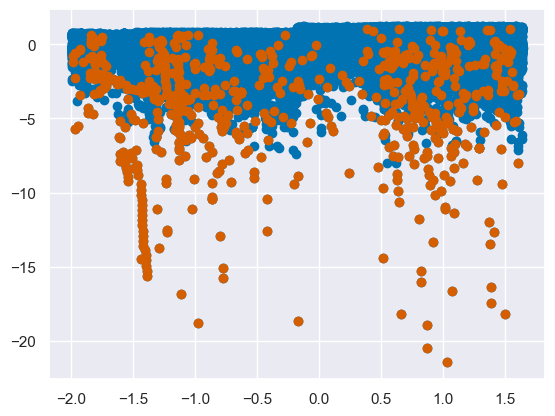

In [101]:
from numpy import quantile, where, random
lofs_index=where(y_pred==-1)
values = X_test[lofs_index]

plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()


In [102]:
y_pred[y_pred == 1] = 0
y_pred

array([ 0,  0,  0, ..., -1, -1, -1])

In [103]:
# y_test

In [104]:
from sklearn import metrics
conf_mx = metrics.confusion_matrix(y_test,y_predDF)

In [105]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [106]:
print(metrics.classification_report(y_test, y_predLOF))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     75000
         1.0       0.18      0.91      0.31       129

    accuracy                           0.99     75129
   macro avg       0.59      0.95      0.65     75129
weighted avg       1.00      0.99      1.00     75129



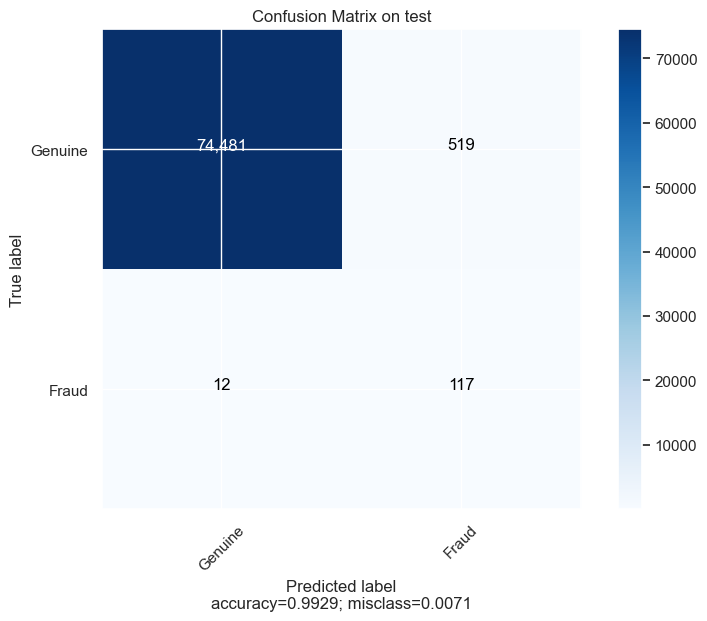

In [107]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

# GAUSSIAN MODEL

In [108]:
# Calculate the  prob on train vs test vs fraud data only (no normals at all)

from scipy.stats import multivariate_normal

# 1 - calculate p the gaussian matrix - like fit/train the model
p = multivariate_normal(mean=np.mean(X_train,axis=0), cov=np.cov(X_train.T))

x = p.pdf(X_train)
print("max prob of x on X_train", max(x))
print("mean prob of x on X_train", np.mean(x))

print('-' * 60)
MyTrain = np.mean(x)

x = p.pdf(X_test)
print("max prob of x on X_test", max(x))
print("mean prob of x on X_test", np.mean(x))

print('-' * 60)
MyTest = np.mean(x)

x = p.pdf(fraud_pca_data)
print("max prob of x on fraud_pca_data", max(x))
print("mean prob of x on fraud_pca_data", np.mean(x))

print('-' * 60)
MyFraud = np.mean(x)

print('Difference between mean prob of Train vs Fraud ', MyTrain - MyFraud)

max prob of x on X_train 2.2552386882104105e-12
mean prob of x on X_train 6.093073190799043e-14
------------------------------------------------------------
max prob of x on X_test 1.7470854036729692e-12
mean prob of x on X_test 6.093995132072283e-14
------------------------------------------------------------
max prob of x on fraud_pca_data 9.639574675464163e-14
mean prob of x on fraud_pca_data 1.0508661127411214e-15
------------------------------------------------------------
Difference between mean prob of Train vs Fraud  5.98798657952493e-14


In [109]:
# Find best epsilon re F1 score

# 2 - calculate the score (x) for each observation on the mixture gaussian matrix
x = p.pdf(X_test)

# 3 - find the best threshold (eps) by using F1 as dependant variable
EpsF1 = []

epsilons = [1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100, 1e-110, 1e-120,
           1e-130, 1e-140, 1e-150, 1e-160, 1e-170, 1e-180, 1e-190, 1e-200, 1e-210, 1e-220, 1e-230, 1e-240]

for e in range(len(epsilons)):
    eps = epsilons[e]
    predGM = (x <= eps)
    f = f1_score(y_test, predGM, average='binary')
    #print("F1 score on test", round(f,4), " with epsilon ", eps)
    EpsF1.append([eps, round(f,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['epsilon', 'F1'])
EpsF1df.head()
print(x)

[1.75119217e-16 2.34910363e-16 9.51582820e-14 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [110]:
# Best Epsilon ... Max F1 on test

EpsF1df.loc[EpsF1df['F1'].idxmax()]

epsilon    1.000000e-210
F1          5.960000e-01
Name: 20, dtype: float64

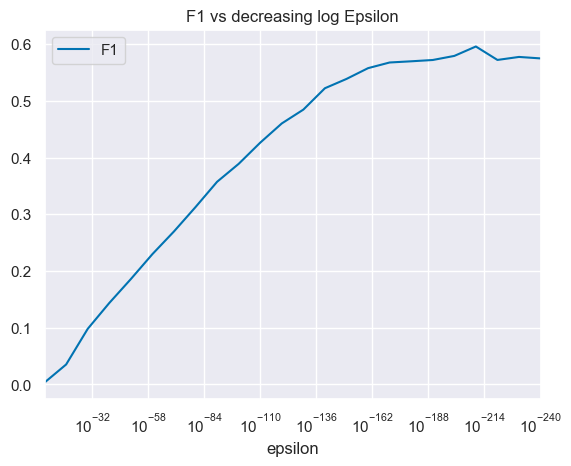

In [111]:
EpsF1df.plot.line("epsilon","F1")
plt.xscale('log')
plt.xlim(1e-10, 1e-240)
plt.title("F1 vs decreasing log Epsilon")
plt.show()

In [112]:
# CONFUSION MATRIX and F1 SCORE on Test w best epsilon

eps = EpsF1df.loc[EpsF1df['F1'].idxmax()]['epsilon']

print("epsilon ", eps)
print("_"*50)
predGM = (x<=eps)
CM = confusion_matrix(y_test,predGM)
tn, fp, fn, tp = confusion_matrix(y_test,predGM).ravel()

print(CM)
print("_"*50)
print("TP ", tp)
print("FP ", fp)
print("TN ", tn)
print("FN ", fn)

epsilon  1e-210
__________________________________________________
[[74884   116]
 [   25   104]]
__________________________________________________
TP  104
FP  116
TN  74884
FN  25


In [113]:
# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precisionGM,recallGM,fbeta_scoreGM, supportGM  = precision_recall_fscore_support(y_test,predGM, average='binary')
print("precision GM ", round((precisionGM), 3))
print("recall GM", round((recallGM), 3))
print("F1 score on Test GM", round((fbeta_scoreGM), 3))

precision GM  0.473
recall GM 0.806
F1 score on Test GM 0.596


In [114]:
print(metrics.classification_report(y_test, predGM))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     75000
         1.0       0.47      0.81      0.60       129

    accuracy                           1.00     75129
   macro avg       0.74      0.90      0.80     75129
weighted avg       1.00      1.00      1.00     75129



# Empiric Covariance (Elliptic Envelope)

In [115]:

from sklearn.covariance import EllipticEnvelope

cov = EllipticEnvelope(contamination = PercFraud, support_fraction = 0.994)
cov_model = cov.fit(X_train)
###
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
y_predR = cov.predict(X_test)

y_predRC = y_predR.copy()
y_predDF2 = pd.DataFrame(y_predRC)

y_predDF2[y_predDF2[0] == 1] = 0
y_predDF2[y_predDF2[0] == -1] = 1

y_predRC = y_predDF2.values
y_predRC = np.ravel(y_predRC)

# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precisionRC,recallRC,fbeta_scoreRC, supportRC  = precision_recall_fscore_support(y_test, y_predRC, average='binary')
print("precision RC ", round((precisionRC), 4))
print("recall RC", round((recallRC), 4))
print("F1 score on Test RC", round((fbeta_scoreRC), 4))

precision RC  0.1881
recall RC 0.8837
F1 score on Test RC 0.3102


In [116]:
print(metrics.classification_report(y_test, y_predRC))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     75000
         1.0       0.19      0.88      0.31       129

    accuracy                           0.99     75129
   macro avg       0.59      0.94      0.65     75129
weighted avg       1.00      0.99      1.00     75129



# Ensemble

In [117]:

df = y_predDF.rename(columns={ y_predDF.columns[0]: "Prediction_LOF" })
df['Test'] = y_test.tolist()
df = df.rename(columns={df.columns[1]: "Test" })
df['Prediction_GM'] = predGM.tolist()
df['Prediction_GM'] = df['Prediction_GM'].replace({False : 0, True: 1})
df['Prediction_RC'] = y_predRC.tolist()


In [118]:
print(df['Prediction_GM'].value_counts())
print(df['Prediction_LOF'].value_counts())
print(df['Prediction_RC'].value_counts())

0    74909
1      220
Name: Prediction_GM, dtype: int64
0    74493
1      636
Name: Prediction_LOF, dtype: int64
0    74523
1      606
Name: Prediction_RC, dtype: int64


In [119]:
n_errors = (df['Prediction_LOF'] != df['Prediction_RC']).sum()
n_errors

556

In [120]:
n_errors = (df['Prediction_GM'] != df['Prediction_RC']).sum()
n_errors

388

In [121]:
n_errors = (df['Prediction_LOF'] != df['Prediction_GM']).sum()
n_errors

416

In [122]:
df

,Prediction_LOF,Test,Prediction_GM,Prediction_RC
0,0,0.0,0,0
1,0,0.0,0,0
2,0,0.0,0,0
3,0,0.0,0,0
4,0,0.0,0,0
...,...,...,...,...
75124,1,1.0,1,1
75125,1,1.0,1,1
75126,1,1.0,1,1
75127,1,1.0,1,1


In [123]:
def f(row):
    if row['Test'] == 1 and row['Prediction_LOF'] == 1  and row['Prediction_GM'] == 1 and row ['Prediction_RC'] == 1:
        val = 'Fraude'
    elif row['Test'] == 0 and row['Prediction_LOF'] == 0 and row['Prediction_GM'] == 0 and row ['Prediction_RC'] == 0:
        val = 'Genuine'
    elif row['Test'] == 1 and row['Prediction_LOF'] == 0 and row['Prediction_GM'] == 0 and row ['Prediction_RC'] == 0:
        val = 'Not detected'
    elif row['Test'] == 1 and (row['Prediction_LOF'] == 1  or row['Prediction_GM'] == 1 or row ['Prediction_RC'] == 1):
        val = 'Fraude'
    else:
        val = 'False Alarme'
    return val

In [124]:
df['Transactions'] = df.apply(f, axis=1)

In [125]:
df['Transactions'].value_counts()

Genuine         74218
False Alarme      782
Fraude            117
Not detected       12
Name: Transactions, dtype: int64

In [126]:
df.head(15)

,Prediction_LOF,Test,Prediction_GM,Prediction_RC,Transactions
0,0,0.0,0,0,Genuine
1,0,0.0,0,0,Genuine
2,0,0.0,0,0,Genuine
3,0,0.0,0,0,Genuine
4,0,0.0,0,0,Genuine
5,0,0.0,0,0,Genuine
6,0,0.0,0,0,Genuine
7,0,0.0,0,0,Genuine
8,0,0.0,0,0,Genuine
9,0,0.0,0,0,Genuine
